In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sales_df = pd.read_csv(
    "data/analytics/city_daily_sales_for_forecast.csv",
    parse_dates=["date"]
)

milk_df = pd.read_csv(
    "data/analytics/city_daily_coconut_milk_usage.csv",
    parse_dates=["date"]
)

# Focus on Shanghai
sh_sales = sales_df[sales_df["city"] == "Shanghai"].copy()
sh_milk = milk_df[milk_df["city"] == "Shanghai"].copy()


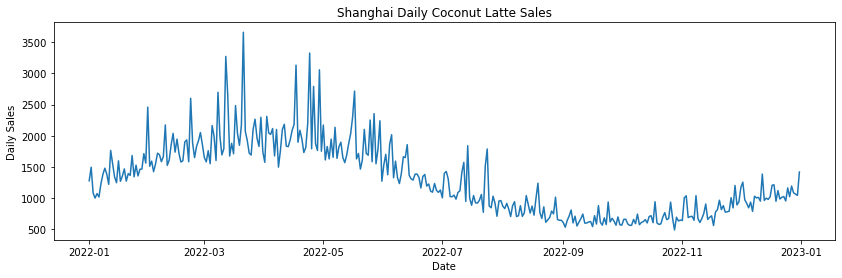

In [2]:
plt.figure(figsize=(14, 4))
plt.plot(sh_sales["date"], sh_sales["coconut_latte_sales"])
plt.title("Shanghai Daily Coconut Latte Sales")
plt.xlabel("Date")
plt.ylabel("Daily Sales")
plt.show()


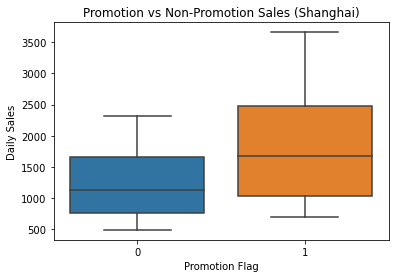

In [3]:
plt.figure(figsize=(6, 4))
sns.boxplot(
    x="promotion_flag",
    y="coconut_latte_sales",
    data=sh_sales
)
plt.title("Promotion vs Non-Promotion Sales (Shanghai)")
plt.xlabel("Promotion Flag")
plt.ylabel("Daily Sales")
plt.show()


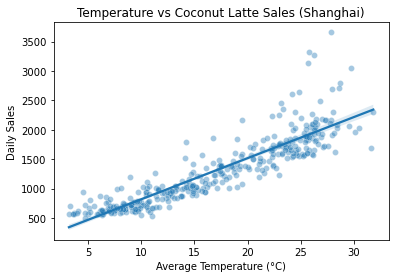

In [4]:
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x="avg_temperature",
    y="coconut_latte_sales",
    data=sh_sales,
    alpha=0.4
)

sns.regplot(
    x="avg_temperature",
    y="coconut_latte_sales",
    data=sh_sales,
    scatter=False
)

plt.title("Temperature vs Coconut Latte Sales (Shanghai)")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Daily Sales")
plt.show()


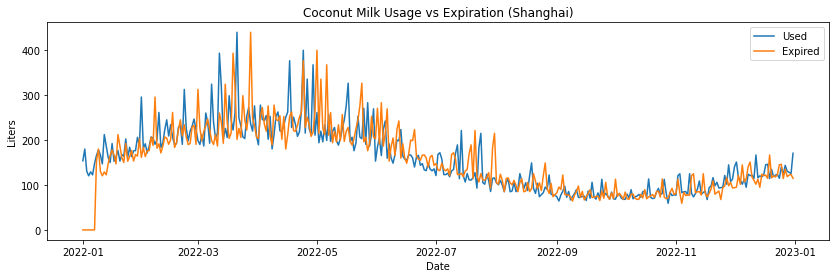

In [5]:
plt.figure(figsize=(14, 4))
plt.plot(
    sh_milk["date"],
    sh_milk["coconut_milk_used"],
    label="Used"
)
plt.plot(
    sh_milk["date"],
    sh_milk["coconut_milk_expired"],
    label="Expired"
)

plt.title("Coconut Milk Usage vs Expiration (Shanghai)")
plt.xlabel("Date")
plt.ylabel("Liters")
plt.legend()
plt.show()


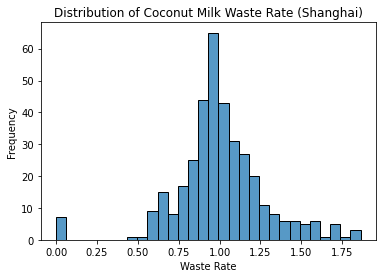

In [6]:
sh_milk["waste_rate"] = (
    sh_milk["coconut_milk_expired"]
    / (sh_milk["coconut_milk_used"] + 1e-6)
)

plt.figure(figsize=(6, 4))
sns.histplot(sh_milk["waste_rate"], bins=30)
plt.title("Distribution of Coconut Milk Waste Rate (Shanghai)")
plt.xlabel("Waste Rate")
plt.ylabel("Frequency")
plt.show()
